In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importy lokalnych modułów
from BST import HashTable as HashTableBST
from AVL import HashTable as HashTableAVL

from Benchmark import calibration_benchmark
from Benchmark import performance_benchmark
from Benchmark import memory_benchmark
from Benchmark import benchmark_builtin_structures
from Generators import generate_keys

In [5]:
# Parametry
test_size = 10000
table_cls = 100
scenarios = ['Posortowana', 'Posortowana szum', 'Losowa unikalna', 'Losowa', 'Powtarzajaca']

In [6]:
calibration = calibration_benchmark()
print(f"Pomiar kalibracyjny trwał: {calibration} s")

Pomiar kalibracyjny trwał: 0.005579000000579981 s


In [7]:
# Generowanie wartości
keys = {}
for scenario in scenarios:
    keys[scenario] = generate_keys(test_size, scenario)

sample_values = pd.DataFrame({ s: keys[s][10:20] for s in scenarios })
sample_values

,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
0,10,7,6254,77649,297
1,11,9,2752,925,623
2,12,10,3912,89198,427
3,13,9,2339,10028,573
4,14,10,414,78300,24
5,15,10,8125,7666,410
6,16,15,6004,92985,278
7,17,12,349,69333,13
8,18,17,5744,79289,582
9,19,20,1658,60720,877


In [8]:
structures = ['BST', 'AVL', 'List', 'Dict']

results_insert = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_insert_normalized = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_search = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_search_normalized = pd.DataFrame({'Struktura': structures}).set_index('Struktura')

for scenario in scenarios:
    bst_ins, bst_srch = performance_benchmark(HashTableBST, table_cls, keys[scenario])

    bst_ins, bst_srch = performance_benchmark(HashTableBST, table_cls, keys[scenario])
    avl_ins, avl_srch = performance_benchmark(HashTableAVL, table_cls, keys[scenario])
    list_perf, dict_perf = benchmark_builtin_structures(keys[scenario])

    results_insert[f"{scenario}"]            = [bst_ins, avl_ins, list_perf[0], dict_perf[0]]
    results_insert_normalized[f"{scenario}"] = [bst_ins / calibration,
                                                avl_ins/ calibration,
                                                list_perf[0] / calibration, 
                                                dict_perf[0] / calibration]

    results_search[f"{scenario}"]             = [bst_srch, avl_srch, list_perf[1], dict_perf[1]]
    results_search_normalized [f"{scenario}"] = [bst_srch / calibration,
                                                 avl_srch / calibration,
                                                 list_perf[1] / calibration,
                                                 dict_perf[1] / calibration]

In [9]:
print("Rezultaty - Dodawanie(s)")
results_insert

Rezultaty - Dodawanie(s)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,0.108945,0.041240,0.011504,0.012087,0.004484
AVL,0.044731,0.037074,0.045169,0.048814,0.013919
List,0.000731,0.000802,0.000797,0.000721,0.000790
Dict,0.000524,0.000561,0.000747,0.000648,0.000394


In [10]:
print("Rezultaty - Dodawanie (znormalizowane)")
results_insert_normalized

Rezultaty - Dodawanie (znormalizowane)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,19.527675,7.392006,2.061947,2.166589,0.803728
AVL,8.017799,6.645331,8.096308,8.749597,2.494820
List,0.131027,0.143807,0.142785,0.129145,0.141674
Dict,0.093870,0.100466,0.133931,0.116168,0.070586


In [11]:
print("Rezultaty - Wyszukiwanie (s)")
results_search

Rezultaty - Wyszukiwanie (s)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,0.052481,0.032132,0.008378,0.008720,0.004097
AVL,0.006087,0.006115,0.010126,0.009414,0.003706
List,1.251896,1.241738,1.619346,1.339847,0.286157
Dict,0.000306,0.000347,0.000330,0.000376,0.000402


In [12]:
print("Rezultaty - Wyszukiwanie (znormalizowane) ")
results_search_normalized

Rezultaty - Wyszukiwanie (znormalizowane) 


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,9.406793,5.759437,1.501667,1.562932,0.734361
AVL,1.091127,1.096075,1.814967,1.687435,0.664259
List,224.394300,222.573633,290.257394,240.159043,51.291844
Dict,0.054813,0.062251,0.059222,0.067360,0.072146


In [13]:
def plot_structures_comparison(df: pd.DataFrame, title: str = 'Porównanie struktur danych w różnych scenariuszach'):
    """
    Rysuje grupowany wykres słupkowy porównujący czasy różnych struktur danych
    w różnych scenariuszach.
    
    Parametry:
    - df: DataFrame z indeksem jako nazwy struktur i kolumnami jako scenariusze,
          wartości to czasy (np. w ms).
    - title: Tytuł wykresu.
    """
    scenarios = df.columns
    structures = df.index
    x = np.arange(len(scenarios))
    width = 0.8 / len(structures)

    plt.figure()
    for i, struktura in enumerate(structures):
        plt.bar(x + i*width, df.loc[struktura], width, label=struktura)
    
    plt.xticks(x + width*(len(structures)-1)/2, scenarios, rotation=45, ha='right')
    plt.xlabel('Scenariusz')
    plt.ylabel('Czas [s]')
    plt.title(title)
    plt.legend(title='Struktura')
    plt.tight_layout()
    plt.show()

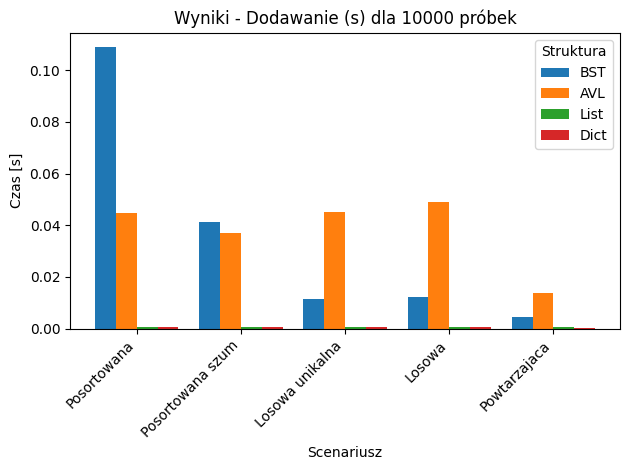

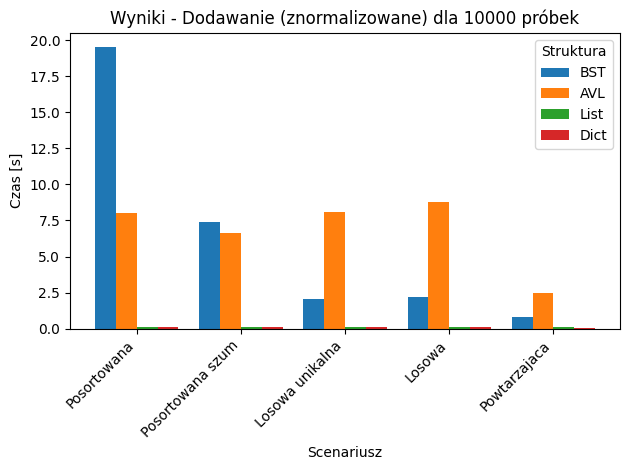

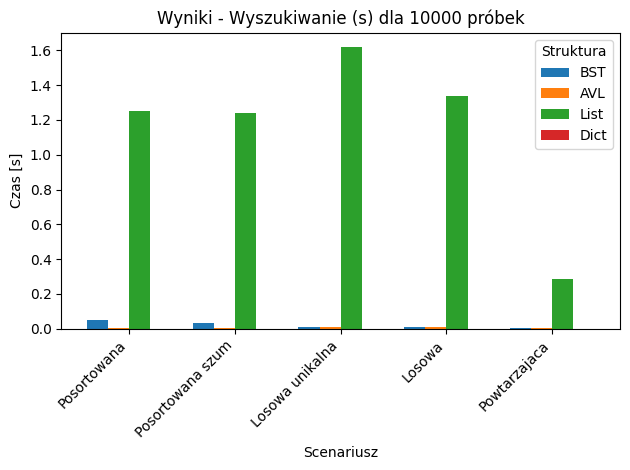

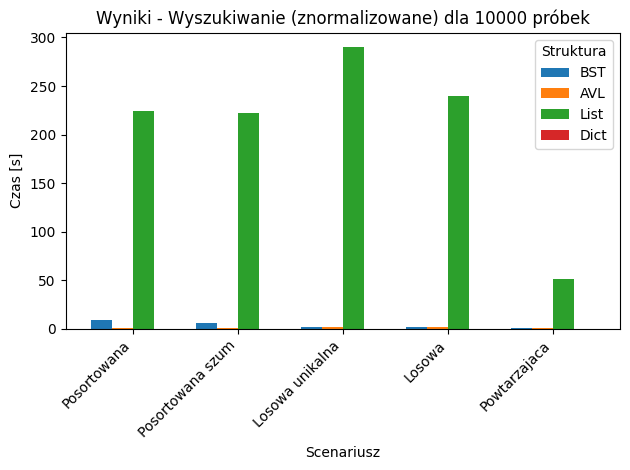

In [14]:

plot_structures_comparison(results_insert, title = f'Wyniki - Dodawanie (s) dla {test_size} próbek')
plot_structures_comparison(results_insert_normalized, title = f'Wyniki - Dodawanie (znormalizowane) dla {test_size} próbek')
plot_structures_comparison(results_search, title = f'Wyniki - Wyszukiwanie (s) dla {test_size} próbek')
plot_structures_comparison(results_search_normalized, title = f'Wyniki - Wyszukiwanie (znormalizowane) dla {test_size} próbek')


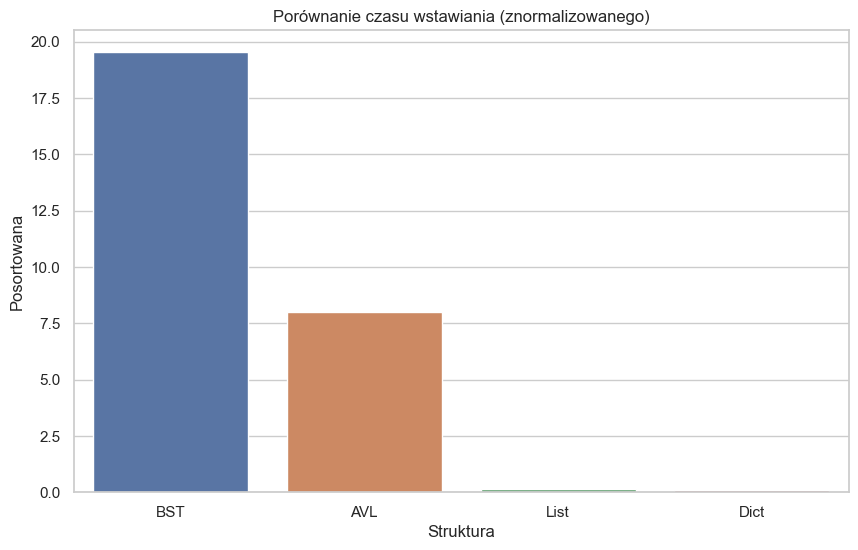

In [15]:
# Wykresy
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_insert_normalized, x="Struktura", y="Posortowana", hue="Struktura", ax=ax)
ax.set_title("Porównanie czasu wstawiania (znormalizowanego)")
plt.show()

#fig, ax = plt.subplots(figsize=(10,6))
#sns.barplot(data=results_df, x="Scenario", y="Search Time", hue="Structure", ax=ax)
#ax.set_title("Porównanie czasu wyszukiwania (znormalizowanego)")
#plt.show()
#
#fig, ax = plt.subplots(figsize=(10,6))
#sns.barplot(data=results_df.dropna(), x="Scenario", y="Memory (MiB)", hue="Structure", ax=ax)
#ax.set_title("Porównanie zużycia pamięci (tylko BST i AVL)")
#plt.show()
#
#results_df